In [123]:
import generatorTool as gt
import numpy as np
import numpy.random as rd 
import matplotlib.pyplot as plt
mm=1000

### Beam parameters setup

##### general parameters

In [124]:
n            =  100000  # number of macroparticles
lorentz_fac  = 120 

transverse phase space setting 
(assumes a Gaussian distribution)

In [125]:
nsigma       =  2  # cut for the Gaussian distrib.
alphax       =  -15  # courant-snyder (CS) parameter
alphay       =   15  # CS parameter
betax        =  20  # courant-snyder (CS) parameter
betay        =  20  # CS parameter
norm_emitx   = 1e-6  # normalized emittance
norm_emity   = 1e-6  # normalized emittance

longitudinal phase space (build a modulated beams)

In [126]:
dLorentz_fac = 1e-4*lorentz_fac   #        spread in Lorentzfactor
blength      = 1e-3
ddOverdz     = 100   # in m^-1 -- chirp (slope)
modul_ampli  = 1 # modulation amplitude (0 to turn off)
modul_wavel  = 5e-4 # wavelength of the modulation

### Running the simulation

In [127]:
# generate the Gaussian distribution in (x,x',y,y')
emitgeomx=norm_emitx/lorentz_fac
emitgeomy=norm_emity/lorentz_fac

x, xp, y, yp = gt.gaussian_phase_space_2dof(n, alphax, betax, emitgeomx,\
                                  alphay, betay, emitgeomy, nsigma)  

# generate the longitudinal phase space:
U=  gt.Gauss_2d_cart_cut(n,1e-10,2.0)

z    = blength*U[0,:]; 
kwave=2*np.pi/modul_wavel
# linearly-chirped longitudinal phase space
dpp0  = dLorentz_fac*U[1,:]+ ddOverdz*z
# add the modulation (uncomment to replace line before)
dpp  = dpp0+ modul_ampli*dLorentz_fac*np.cos(kwake*z)

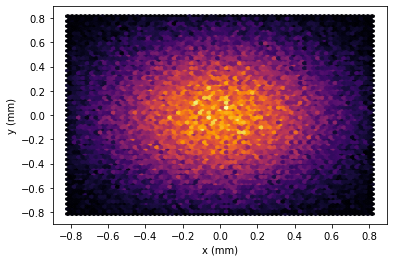

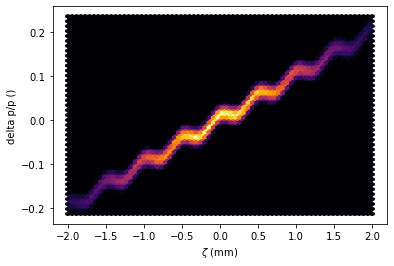

In [128]:
plt.hexbin (mm*x,mm*y, gridsize=70, cmap='inferno')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()
plt.hexbin (mm*z,dpp, gridsize=70, cmap='inferno')
#plt.plot (z,dpp,'.')
plt.xlabel(r'$\zeta$ (mm)')
plt.ylabel('delta p/p ()')
plt.show()


### Apply a transformation a drift here



In [120]:
L=1.2 # meter
x_fin=x+L*xp
y_fin=y+L*yp
# should apply the full transfer matrix in your case


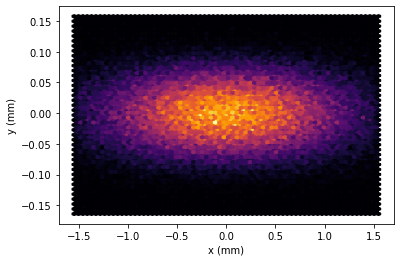

In [129]:
plt.hexbin (mm*x_fin,mm*y_fin, gridsize=70, cmap='inferno')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()